In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1600x1000 with 0 Axes>

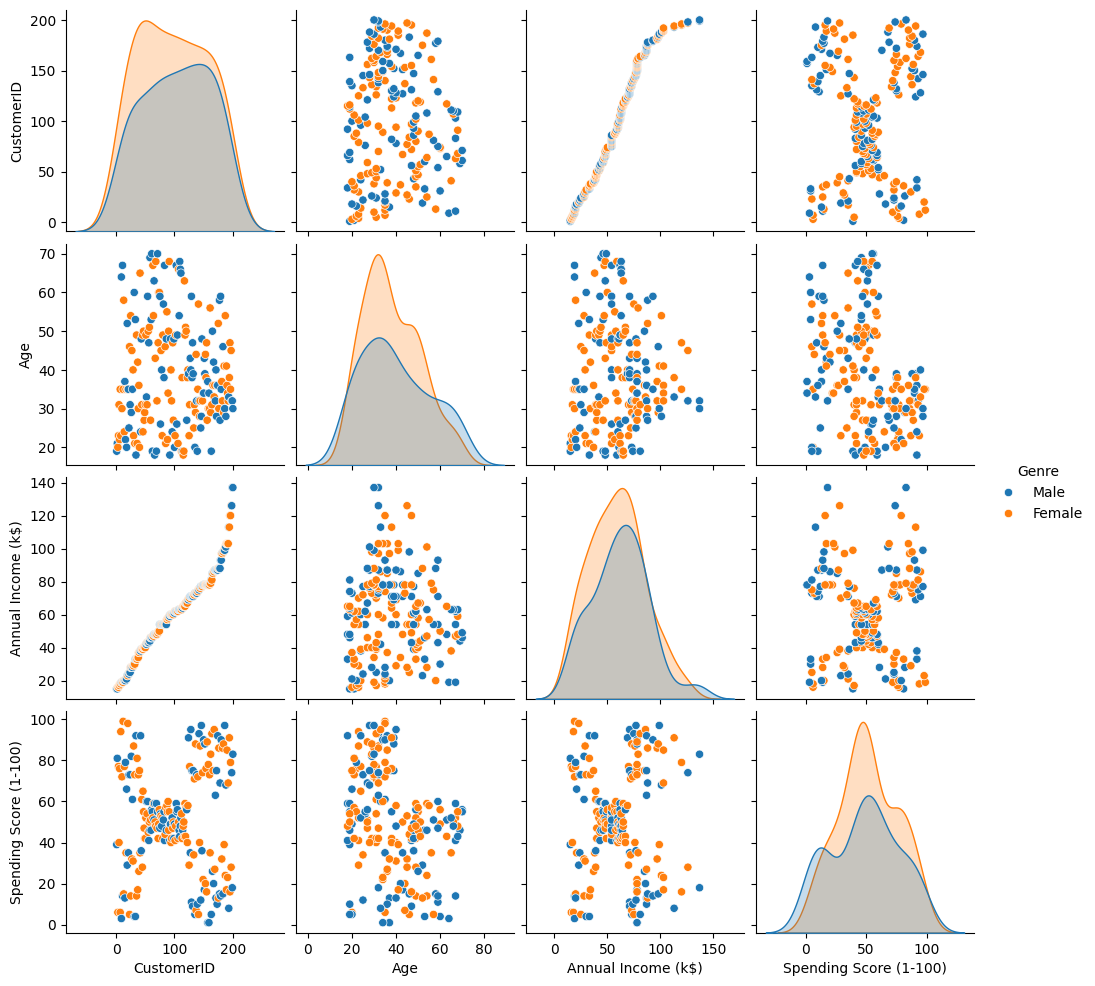

In [12]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Genre')
plt.show()

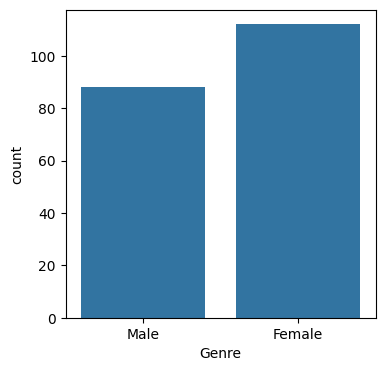

In [13]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Genre', data=df)
plt.show()

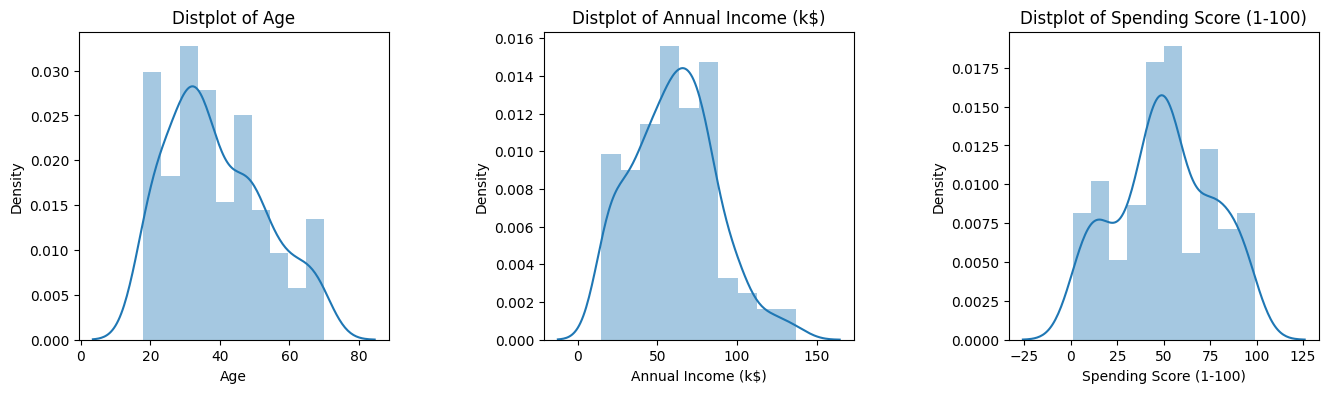

In [14]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
X = df.iloc[:, -2:]

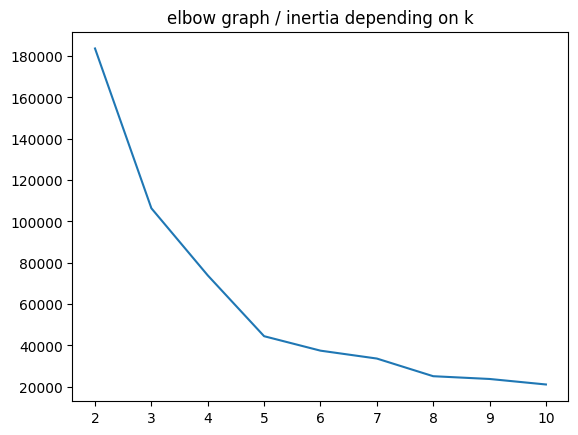

In [17]:
sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()


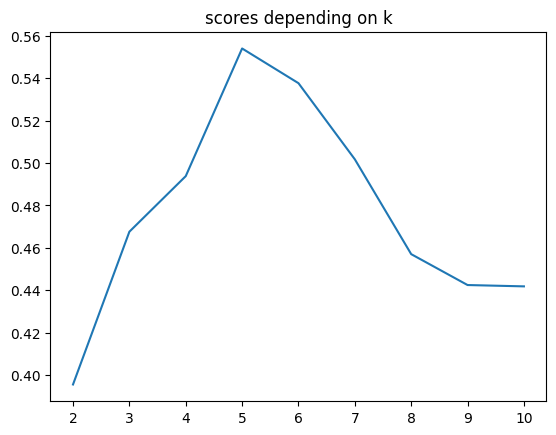

In [20]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()


In [22]:
km = KMeans(n_clusters=5).fit(X)

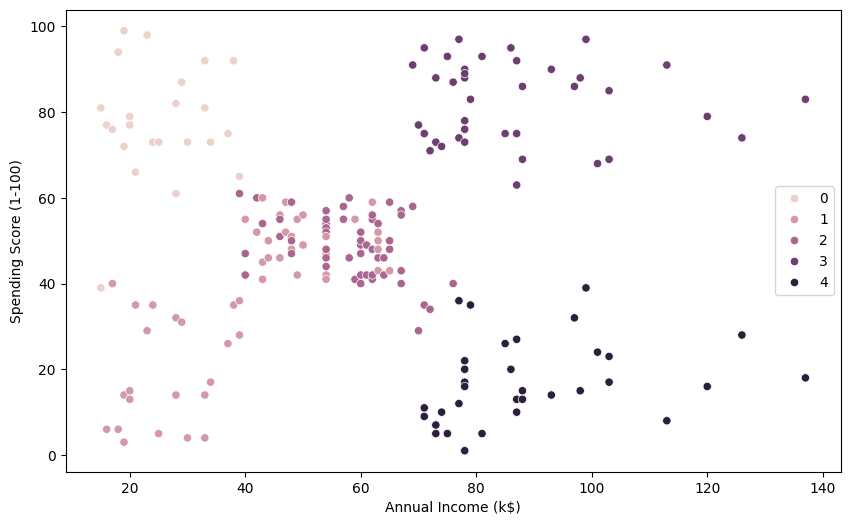

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_)
plt.show()


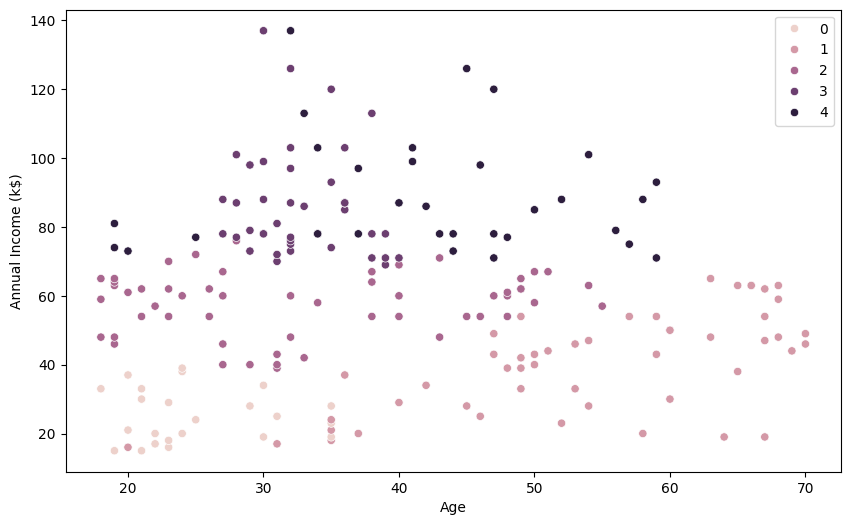

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_)
plt.show()


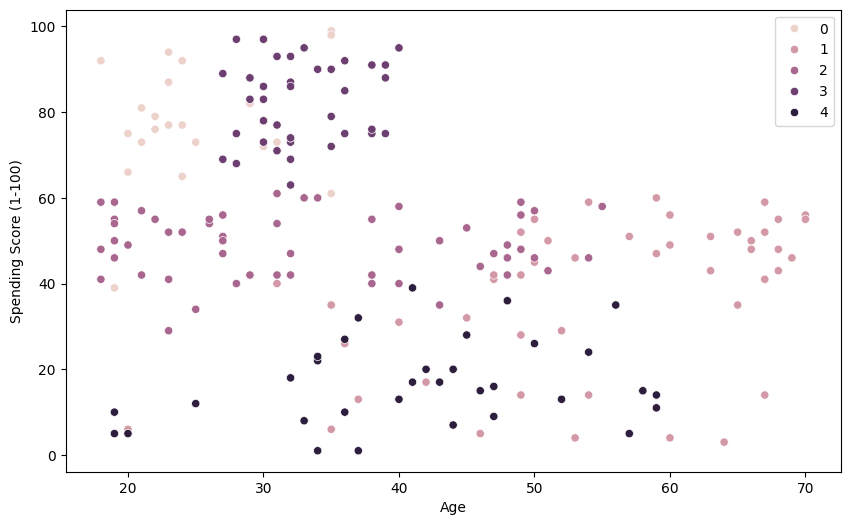

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_)
plt.show()


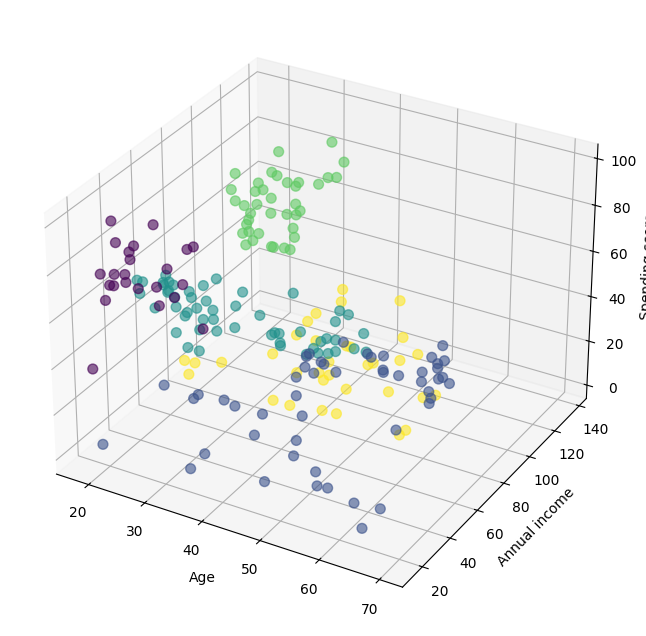

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X.iloc[:, 0]  # Age
ys = X.iloc[:, 1]  # Annual income
zs = X.iloc[:, 2]  # Spending score

ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()


In [29]:
# Profiles of customers
X['label'] = km.labels_

In [31]:
X.label.value_counts()

,count
label,
2,54
1,50
3,39
4,34
0,23


In [32]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
        Age  Annual Income (k$)  Spending Score (1-100)
count  23.0            23.00000               23.000000
mean   25.0            25.26087               77.608696
min    18.0            15.00000               39.000000
max    35.0            39.00000               99.000000



cluster nb : 1
         Age  Annual Income (k$)  Spending Score (1-100)
count  50.00               50.00                   50.00
mean   54.06               40.46                   36.72
min    20.00               16.00                    3.00
max    70.00               65.00                   60.00



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  54.000000           54.000000                    54.0
mean   33.351852           57.703704                    49.0
min    18.000000           39.000000                    29.0
max    55.000000           76.000000                    61.0



cluster nb : 3
             Age  Annual Income (k$)  Spending Score (1-100)


In [33]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,50.00,50.00,50.00
mean,54.06,40.46,36.72
min,20.00,16.00,3.00
max,70.00,65.00,60.00
